<p style="text-align:center"> 
    <a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/" target="_blank"> 
    <img src="../../assets/logo.png" width="200" alt="Flavio Aguirre Logo"> 
    </a>
</p>

# <h1 align="center"><font size="7"><strong>Weather Wise</strong></font></h1>
<hr>

# Model evaluation and refinement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, roc_auc_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
    )

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('../../data/processed/weatherAUS-data-engineered.csv')
print('load success')
df.head()

load success


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainToday,Season,TempDiff,TempChange,PressureDiff,HumidityDiff,WindSpeedDiff,AvgHumidity,AvgTemp,RainfallPerSunshine
0,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,Yes,Summer,8.7,2.2,1.3,-18.0,10.0,46.0,17.00,0.000000
1,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,No,Summer,10.0,3.3,1.3,-7.0,-5.0,46.5,14.15,0.092308
2,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,No,Summer,14.8,6.2,-3.2,-16.0,6.0,43.0,16.50,0.000000
3,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,No,Summer,21.1,12.2,-3.4,-44.0,18.0,45.0,22.10,0.000000
4,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,No,Summer,19.3,7.7,-1.6,-20.0,11.0,41.0,23.25,0.000000


In [3]:
model = joblib.load('../../models/randomforest_precipicheck.pkl')
print('load model success')

load model success


In [4]:
X = df.drop(columns=['RainToday'])
y = df['RainToday']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [11]:
y_prob = model.predict_proba(X_test)

### Report

In [14]:
print("Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro')) # Change to 'macro' or 'weighted' if there are more than 2 classes
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:,1])) # Only for binary

print("\nFull report:\n")
print(classification_report(y_test, y_pred))

Report:
Accuracy: 0.8558201058201058
Precision: 0.8156475166647401
Recall: 0.744663905702453
F1 Score: 0.7704719858501734
ROC AUC: 0.9003725808378463

Full report:

              precision    recall  f1-score   support

          No       0.88      0.95      0.91      1168
         Yes       0.76      0.54      0.63       344

    accuracy                           0.86      1512
   macro avg       0.82      0.74      0.77      1512
weighted avg       0.85      0.86      0.85      1512



* ``Accuracy``: 0.856 => 85.6% of all predictions were correct (both rain and no rain).
* ``Precision``: 0.816 => Of all the days the model predicted it would rain, it actually rained on 81.6%.
* ``Recall``: 0.745 => The model correctly detected 74.5% of the days on which it actually rained.
* ``F1 Score``: 0.770 => It is the balance between precision and recall.
* ``ROC AUC``: 0.900 => The model has a 90% ability to distinguish between rainy and non-rainy days.

| Metric | Result | Interpretation |
| --------- | --------- | ----------------------------------------------------------------- |
| Accuracy | 85.6% | Generally reliable if the classes are not too unbalanced. |
| Precision | 81.6% | High → Few false alarms. |
| Recall | 74.5% | Good → Detects most rainy days. |
| F1 Score | 77.0% | Good balance between precision and recall. |
| ROC AUC | 90.0% | Very good model in terms of overall discrimination. |

### Confusion matrix

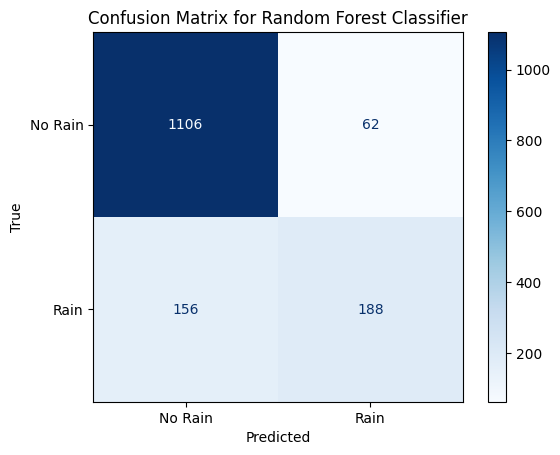

In [74]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=[0, 1], labels=['No Rain', 'Rain'])
plt.yticks(ticks=[0, 1], labels=['No Rain', 'Rain'])
plt.grid(False)

# save the figure
plt.savefig('../../reports/figures/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### What does this matrix reveal?
* The model is very good at ``predicting "No Rain" (94.7% specificity)``.
* But it ``struggles`` to detect ``"Rain" (low recall: 54.6%)``.
* This could mean that the ``model is conservative``, only predicting "Rain" when it is very confident.

**Predicted probability ditribution**

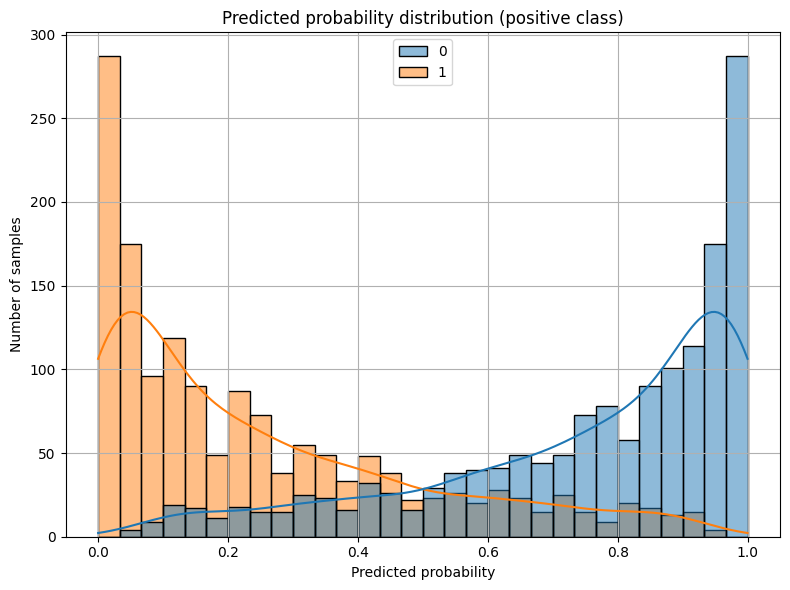

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(y_prob, bins=30, kde=True)
plt.title('Predicted probability distribution (positive class)')
plt.xlabel('Predicted probability')
plt.ylabel('Number of samples')
plt.grid()

# Save the figure
plt.savefig('../../reports/figures/predicted_probability_distribution.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

**What does this graph show?**

🔵 Class 0 (No Rain):

``High concentration near probability = 0``, which is expected and desired.

Much of this data has ``low probability values ​​(< 0.2), indicating that the model is doing a good job of predicting days without rain``.

🟠 Class 1 (Rain):

Many predictions have ``low probability (< 0.4), even though it actually rained``!

This explains why our model has a ``low recall (54.6%)``: it is labeling ``many days that actually rained as "No Rain"``.

The model is very hesitant when predicting rain, and only does so when it is very certain. This results in low recall for the "Rain" class, as we saw in the confusion matrix. This graph clearly confirms this.

### ``Conclusion``
This model classifies days without rain very well, but it still has room for improvement in detecting rainy days. We could improve this by adjusting the ``decision threshold``, using resampling techniques (SMOTE, undersampling), ``or adjusting class weights``.

## FeatureImportance
We obtain all the feature importances and associate them with their transformed features.

In [59]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

In [60]:
numeric_features = X_train.select_dtypes(include=['float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

We graph it

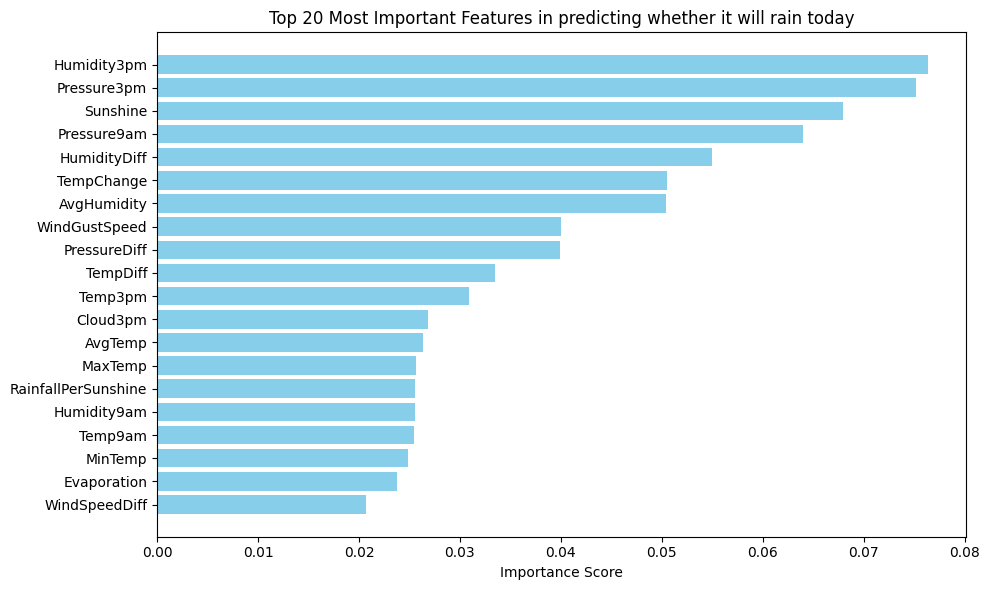

In [ ]:
# Combine numeric and categorical feature names
feature_names = numeric_features + list(model.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = model.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

N = 20
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')

# Save the figure
plt.savefig('../../reports/figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

The graph clearly shows the 20 most important features used by the model to predict whether it will rain today (RainToday). We could further improve the model by reducing the dimensionality or continuing to adjust the weights as we saw earlier. We could even adjust the decision threshold, since we used the default parameters (y_proba > 0.5).


<br>

### Final conclusions
<hr>

We could test different models and even revise the data analysis to improve the performance of this model. Perhaps we can design better features, discard irrelevant or redundant ones, project your data into a dimensional feature space, or impute missing values ​​so we can use more data. You could also try a broader set of parameters to define our search grid, or even design new features using cluster analysis. Or perhaps include the clustering algorithm's hyperparameters in the search grid...

But overall, we achieved a very well-balanced model that performs excellently for a real-world problem.

<br>

<hr>

## Author

<a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/">**Flavio Aguirre**</a>
<br>
<a href="https://coursera.org/share/e27ae5af81b56f99a2aa85289b7cdd04">***Data Scientist***</a>